In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

In [93]:
def find_index(geo_df, bh, depth):
    try: 
        filtered_df = geo_df[geo_df["PointID"] == bh]
        bottom_depth = filtered_df["Depth"].iloc[-1]
        for index, row in filtered_df.iterrows():
            if depth >= row["Top depth"] and depth < row["Depth"]:
                ind = row["Index"]
            elif depth == bottom_depth:
                ind =  bottom_depth = filtered_df["Index"].iloc[-1]
                break
        return ind
    except Exception as e:
        print("find_index", bh, depth, e)
        return "error"

## Import Su from raw gINT data

In [94]:
geo_df

Unnamed: 0        PointID  Top depth  Depth  Index Mean BD (kn/m3)  \
0             0  544WTG23-BH01       0.00   2.80      1           19.11   
1             1  544WTG23-BH01       2.80   7.90      2          18.326   
2             2  544WTG23-BH01       7.90  10.60      3         19.7715   
3             3  544WTG23-BH01      10.60  12.55      4         19.6392   
4             4  544WTG23-BH01      12.55  16.00      5          18.816   
..          ...            ...        ...    ...    ...             ...   
119         119  544WTG23-BH11      17.00  27.60      6          18.228   
120         120  544WTG23-BH11      27.60  29.00      7          18.767   
121         121  544WTG23-BH11      29.00  30.50      8          19.306   
122         122  544WTG23-BH11      30.50  36.50      9          17.346   
123         123  544WTG23-BH11      36.50  50.20     10          17.444   

     Cum BD (kn/m3)  
0          0.000000  
1         53.508000  
2        198.283400  
3        407.861300  
4        654.333260  
..              ...  
119      970.125247  
120     1473.218047  
121     2017.461047  
122     2606.294047  
123     3239.423047  

[124 rows x 7 columns]

In [95]:
sample, depth, su, test = [], [], [], []
su_dict = {
    "LPEN" : "LPEN_PPEN",
    "TORV":"TORV_PUSS",
    "UU":"TRIT_CU",
    "CU":"TRET_SHST",
    "DSS":"DSST_FSHS"}

for test_type in su_dict:
    df = pd.read_excel("data/gint export_310724_su.xlsx", test_type)
    if test_type == "CU":
        cu_test_type = df["Test type"].to_list()
    # Add id, su and tests into respective lists
    for i in range(len(df)):
        sample.append(df["PointID"][i][:13])
        depth.append(df["Depth"][i])
        su.append(abs(df[su_dict[test_type]][i]))    # use abs here because some Su from CAUe are negative
        if test_type == "CU":
            test.append(df["Test type"][i])
        else:
            test.append(test_type)


su_df = pd.DataFrame(list(zip(sample, depth, su, test)), columns=["PointID", "Depth", "Su", "Test"])
su_df["Index"] = su_df.apply(lambda x: find_index(geo_df, x.PointID, x.Depth), axis=1)

In [96]:
cpt_df = pd.read_excel("data/CPT parameter update.xlsx")
geo_df = pd.read_excel("data/BD profile.xlsx")
geo_df

Unnamed: 0        PointID  Top depth  Depth  Index Mean BD (kn/m3)  \
0             0  544WTG23-BH01       0.00   2.80      1           19.11   
1             1  544WTG23-BH01       2.80   7.90      2          18.326   
2             2  544WTG23-BH01       7.90  10.60      3         19.7715   
3             3  544WTG23-BH01      10.60  12.55      4         19.6392   
4             4  544WTG23-BH01      12.55  16.00      5          18.816   
..          ...            ...        ...    ...    ...             ...   
119         119  544WTG23-BH11      17.00  27.60      6          18.228   
120         120  544WTG23-BH11      27.60  29.00      7          18.767   
121         121  544WTG23-BH11      29.00  30.50      8          19.306   
122         122  544WTG23-BH11      30.50  36.50      9          17.346   
123         123  544WTG23-BH11      36.50  50.20     10          17.444   

     Cum BD (kn/m3)  
0          0.000000  
1         53.508000  
2        198.283400  
3        407.861300  
4        654.333260  
..              ...  
119      970.125247  
120     1473.218047  
121     2017.461047  
122     2606.294047  
123     3239.423047  

[124 rows x 7 columns]

# Calculate Su for different Nkt values

In [97]:
cpt_df["Su (Nkt 10)"] = (cpt_df["qnet (kPa)"] - cpt_df["σv (kPa)"]) / 10
cpt_df["Su (Nkt 20)"] =  (cpt_df["qnet (kPa)"] - cpt_df["σv (kPa)"]) / 20
cpt_df

Unnamed: 0.1  Unnamed: 0        PointID CPT_hole  Depth (m)   qc (MPa)  \
0                 0           0  544WTG23-BH10    CPT10    0.00000   0.003214   
1                 1           1  544WTG23-BH10    CPT10    0.01000   0.003214   
2                 2           2  544WTG23-BH10    CPT10    0.02000   0.003214   
3                 3           3  544WTG23-BH10    CPT10    0.03000   0.003214   
4                 4           4  544WTG23-BH10    CPT10    0.04000   0.003214   
...             ...         ...            ...      ...        ...        ...   
39348         46587       46587  544WTG23-BH11    CPT11   14.61024  45.343010   
39349         46588       46588  544WTG23-BH11    CPT11   14.62024  45.557530   
39350         46589       46589  544WTG23-BH11    CPT11   14.63024  51.760460   
39351         46590       46590  544WTG23-BH11    CPT11   14.64024  37.670360   
39352         46591       46591  544WTG23-BH11    CPT11   14.65024  43.631380   

       fs (MPa)   Inc. NS    Inc EW  u2 (MPa)  ...        Bq   Ic  \
0           0.0 -0.425142  0.372760  0.000597  ...  1.006624  0.0   
1           0.0 -1.389042 -0.696828  0.000597  ...  1.006405  0.0   
2           0.0 -0.095290  0.021505  0.000597  ...  1.006186  0.0   
3           0.0 -0.197911  0.881720  0.000597  ...  1.005968  0.0   
4           0.0 -0.535092  0.777778  0.000597  ...  1.005750  0.0   
...         ...       ...       ...       ...  ...       ...  ...   
39348       0.0  0.163881 -2.779262 -6.816239  ... -0.170384  0.0   
39349       0.0  0.175762 -3.620167 -1.474359  ... -0.045636  0.0   
39350       0.0  0.229843 -3.841083 -2.784900  ... -0.066216  0.0   
39351       0.0  0.188463 -3.734188 -1.509972  ... -0.056436  0.0   
39352       0.0  0.198705 -5.961162 -3.319088  ... -0.091756  0.0   

                Su  OCR Robertson  OCR Mayne      Su/σ'v  Qnc  mCPTu  \
0       -29.511864            0.0        0.0        -inf  0.0    0.0   
1       -29.525234            0.0        0.0 -331.074618  0.0    0.0   
2       -29.538604            0.0        0.0 -165.612270  0.0    0.0   
3       -29.551974            0.0        0.0 -110.458154  0.0    0.0   
4       -29.565344            0.0        0.0  -82.881096  0.0    0.0   
...            ...            ...        ...         ...  ...    ...   
39348  3092.143675            0.0        0.0   23.772847  0.0    0.0   
39349  3183.765444            0.0        0.0   24.459715  0.0    0.0   
39350  3608.096198            0.0        0.0   27.699852  0.0    0.0   
39351  2619.860081            0.0        0.0   20.098640  0.0    0.0   
39352  3019.789049            0.0        0.0   23.150194  0.0    0.0   

       Su (Nkt 10)  Su (Nkt 20)  
0       -41.316610   -20.658305  
1       -41.335328   -20.667664  
2       -41.354046   -20.677023  
3       -41.372764   -20.686382  
4       -41.391482   -20.695741  
...            ...          ...  
39348  4329.001145  2164.500573  
39349  4457.271621  2228.635811  
39350  5051.334677  2525.667339  
39351  3667.804113  1833.902057  
39352  4227.704669  2113.852335  

[39353 rows x 27 columns]

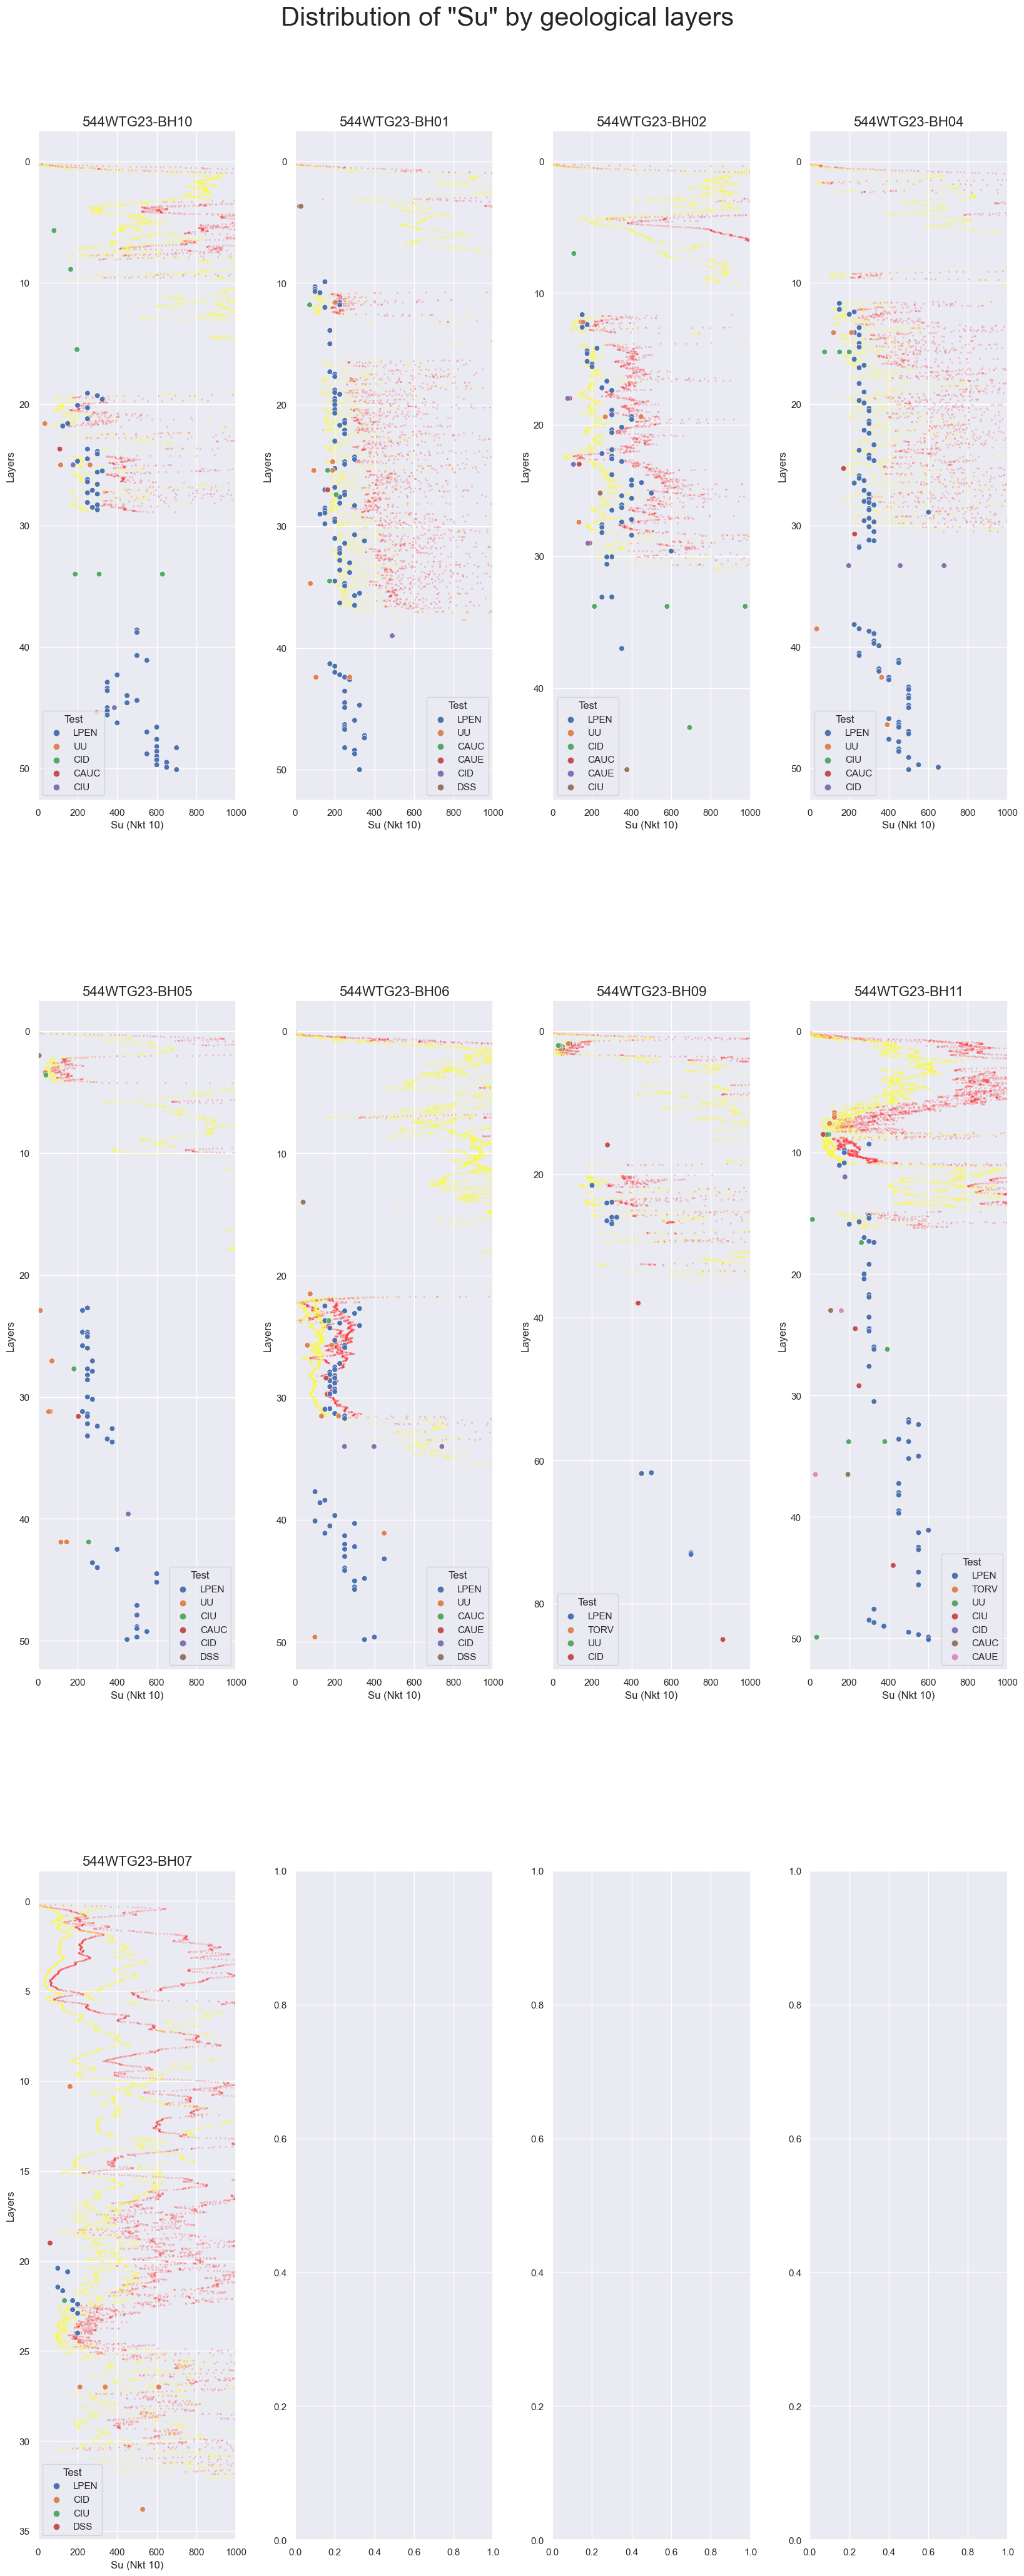

In [100]:
plot_df = cpt_df
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(3, 4)
fig.suptitle(f'Distribution of "Su" by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 50)})
sns.set(font_scale=1) 
for row in range(3):
    for col in range(4):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.2, ax=axes[row, col], s=5, color="red")
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.2, ax=axes[row, col], s=5, color="yellow")
            ax = sns.scatterplot(data=fsu_df, x="Su", y="Depth", hue="Test", alpha=1, ax=axes[row, col], s=40)
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Layers")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            bh += 1

## Derive Nkt

In [99]:
def find_Nkt(cpt_df, bh, depth, cpt_su):
    df = cpt_df[cpt_df["PointID"] == bh]
    df = df[(df["Depth (m)"] < depth + 0.1) & (df["Depth (m)"] > depth - 0.1)]
    Nkt = (df["qnet (kPa)"].mean() - df["σv (kPa)"].mean()) / cpt_su
    return Nkt, df["qnet (kPa)"].mean() - df["σv (kPa)"].mean()

def find_Nkt_layer(cpt_df, bh, depth, index, cpt_su):
    df = cpt_df[(cpt_df["PointID"] == bh) & (cpt_df["Index"] == index)]
    Nkt = (df["qnet (kPa)"].mean() - df["σv (kPa)"].mean()) / cpt_su
    return Nkt, df["qnet (kPa)"].mean() - df["σv (kPa)"].mean()

su_df[["Derived Nkt", "qnet - σv"]] = su_df.apply(lambda x: find_Nkt_layer(cpt_df, x.PointID, x.Depth, x.Index, x.Su),
                                                  axis=1, result_type="expand")

In [101]:
su_df[["Derived Nkt", "qnet - σv"]] = su_df.apply(lambda x: find_Nkt(cpt_df, x.PointID, x.Depth, x.Su), axis=1, result_type="expand")
# su_df["Nkt check"] = su_df["Derived Nkt"].apply(lambda x: "In" if (x <= 20 and x > 10) else ("Mid" if (x < 25 and x > 10) else "Out"))
su_df["Nkt check"] = su_df["Derived Nkt"].apply(lambda x: "In" if (x <= 20 and x > 10) else "Out")
su_df

PointID  Depth     Su  Test  Index  Derived Nkt     qnet - σv  \
0    544WTG23-BH01   9.89  150.0  LPEN      3   273.810308  41071.546168   
1    544WTG23-BH01   9.90  150.0  LPEN      3   267.921018  40188.152653   
2    544WTG23-BH01  10.30  100.0  LPEN      3   263.716705  26371.670533   
3    544WTG23-BH01  10.31  100.0  LPEN      3   263.840527  26384.052693   
4    544WTG23-BH01  10.50  100.0  LPEN      3   262.452606  26245.260553   
..             ...    ...    ...   ...    ...          ...           ...   
603  544WTG23-BH01   3.70   29.0   DSS      2   365.172155  10589.992496   
604  544WTG23-BH03  18.50   32.0   DSS      5          NaN           NaN   
605  544WTG23-BH05   2.00    6.0   DSS      2  1085.113184   6510.679107   
606  544WTG23-BH06  14.00   40.0   DSS      2   525.556086  21022.243444   
607  544WTG23-BH07  19.00   61.0   DSS      6   122.171187   7452.442430   

    Nkt check  
0         Out  
1         Out  
2         Out  
3         Out  
4         Out  
..        ...  
603       Out  
604       Out  
605       Out  
606       Out  
607       Out  

[608 rows x 8 columns]

nan nan


(0.0, 400.0)

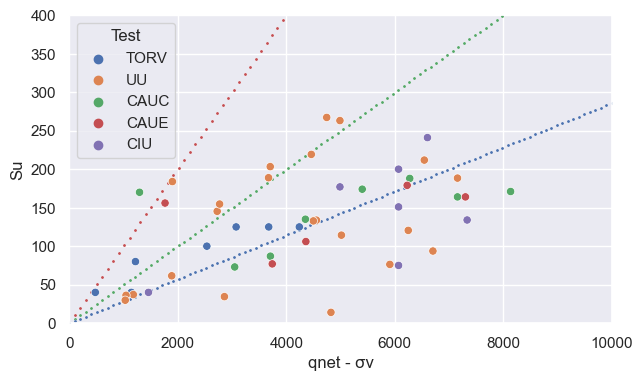

In [102]:
plot_df = su_df[(su_df["Test"] != "LPEN") & (su_df["Test"] != "CID") & (su_df["Test"] != "DSS")]

linex = np.linspace(0, 10000, 100)
liney10 = (1/10)*linex
liney20 = (1/20)*linex
liney30 = (1/35)*linex
ax = sns.set(rc={"figure.figsize":(7, 4)})
ax = sns.scatterplot(x=linex, y=liney10, s=5, color="r")
ax = sns.scatterplot(x=linex, y=liney20, s=5, color="g")
ax = sns.scatterplot(x=linex, y=liney30, s=5, color="b")
#ax = sns.regplot(x=plot_df["qnet - σv"], y=plot_df["Su"], color="pink")
ax = sns.scatterplot(data=plot_df, x="qnet - σv", y="Su", hue="Test")
# get equation of line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=plot_df["qnet - σv"], y=plot_df["Su"])
print(round(slope, 2), round(intercept, 2))
ax.set_xlim(0, 10000)
ax.set_ylim(0, 400)

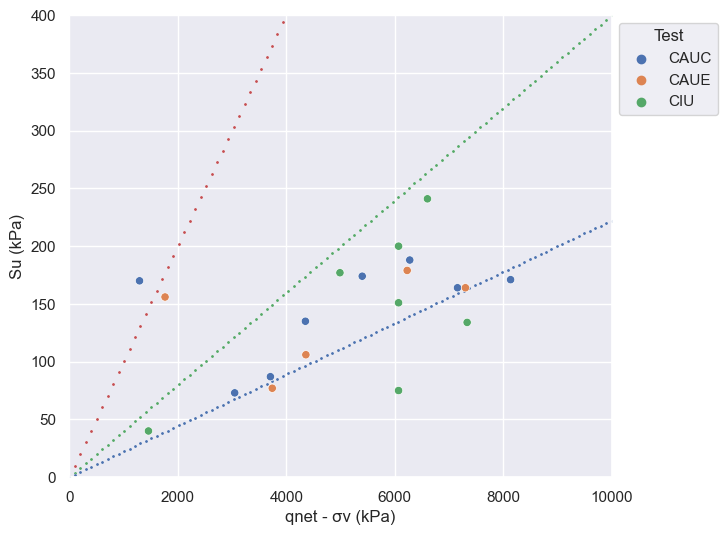

In [108]:
plot_df = su_df[(su_df["Test"] != "LPEN") & (su_df["Test"] != "CID") & (su_df["Test"] != "DSS")]
plot_df = su_df[(su_df["Test"] == "CIU") | (su_df["Test"] == "CAUC") | (su_df["Test"] == "CAUE")]

linex = np.linspace(0, 10000, 100)
liney10 = (1/10)*linex
liney20 = (1/25)*linex
liney30 = (1/45)*linex
ax = sns.set(rc={"figure.figsize":(7, 6)})
ax = sns.scatterplot(x=linex, y=liney10, s=5, color="r")
ax = sns.scatterplot(x=linex, y=liney20, s=5, color="g")
ax = sns.scatterplot(x=linex, y=liney30, s=5, color="b")
#ax = sns.regplot(x=plot_df["qnet - σv"], y=plot_df["Su"], color="pink")
ax = sns.scatterplot(data=plot_df, x="qnet - σv", y="Su", hue="Test")
# get equation of line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=plot_df["qnet - σv"], y=plot_df["Su"])
#print(round(slope, 2), round(intercept, 2))
ax.set_xlim(0, 10000)
ax.set_ylim(0, 400)
ax.set_xlabel("qnet - σv (kPa)")
ax.set_ylabel("Su (kPa)")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

(0.0, 100.0)

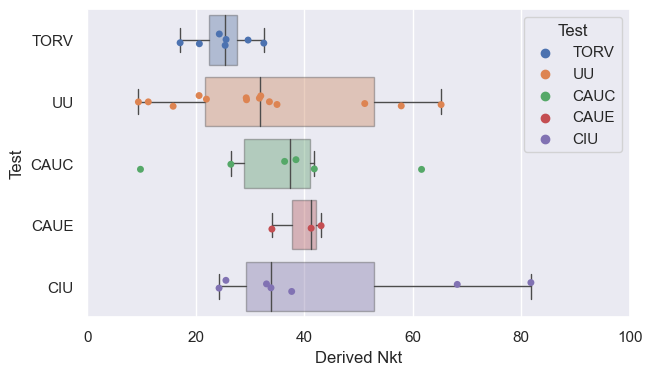

In [60]:
#plot_df = su_df[su_df["Nkt check"] == "In"]
#plot_df = su_df
sns.set(rc={"figure.figsize":(7, 4)})
sns.boxplot(data=plot_df, x="Derived Nkt", y="Test", boxprops=dict(alpha=.4), linewidth=1, showfliers= False)
sns.stripplot(data=plot_df, x="Derived Nkt", y="Test", orient="h", hue="Test").set_xlim(0, 100)

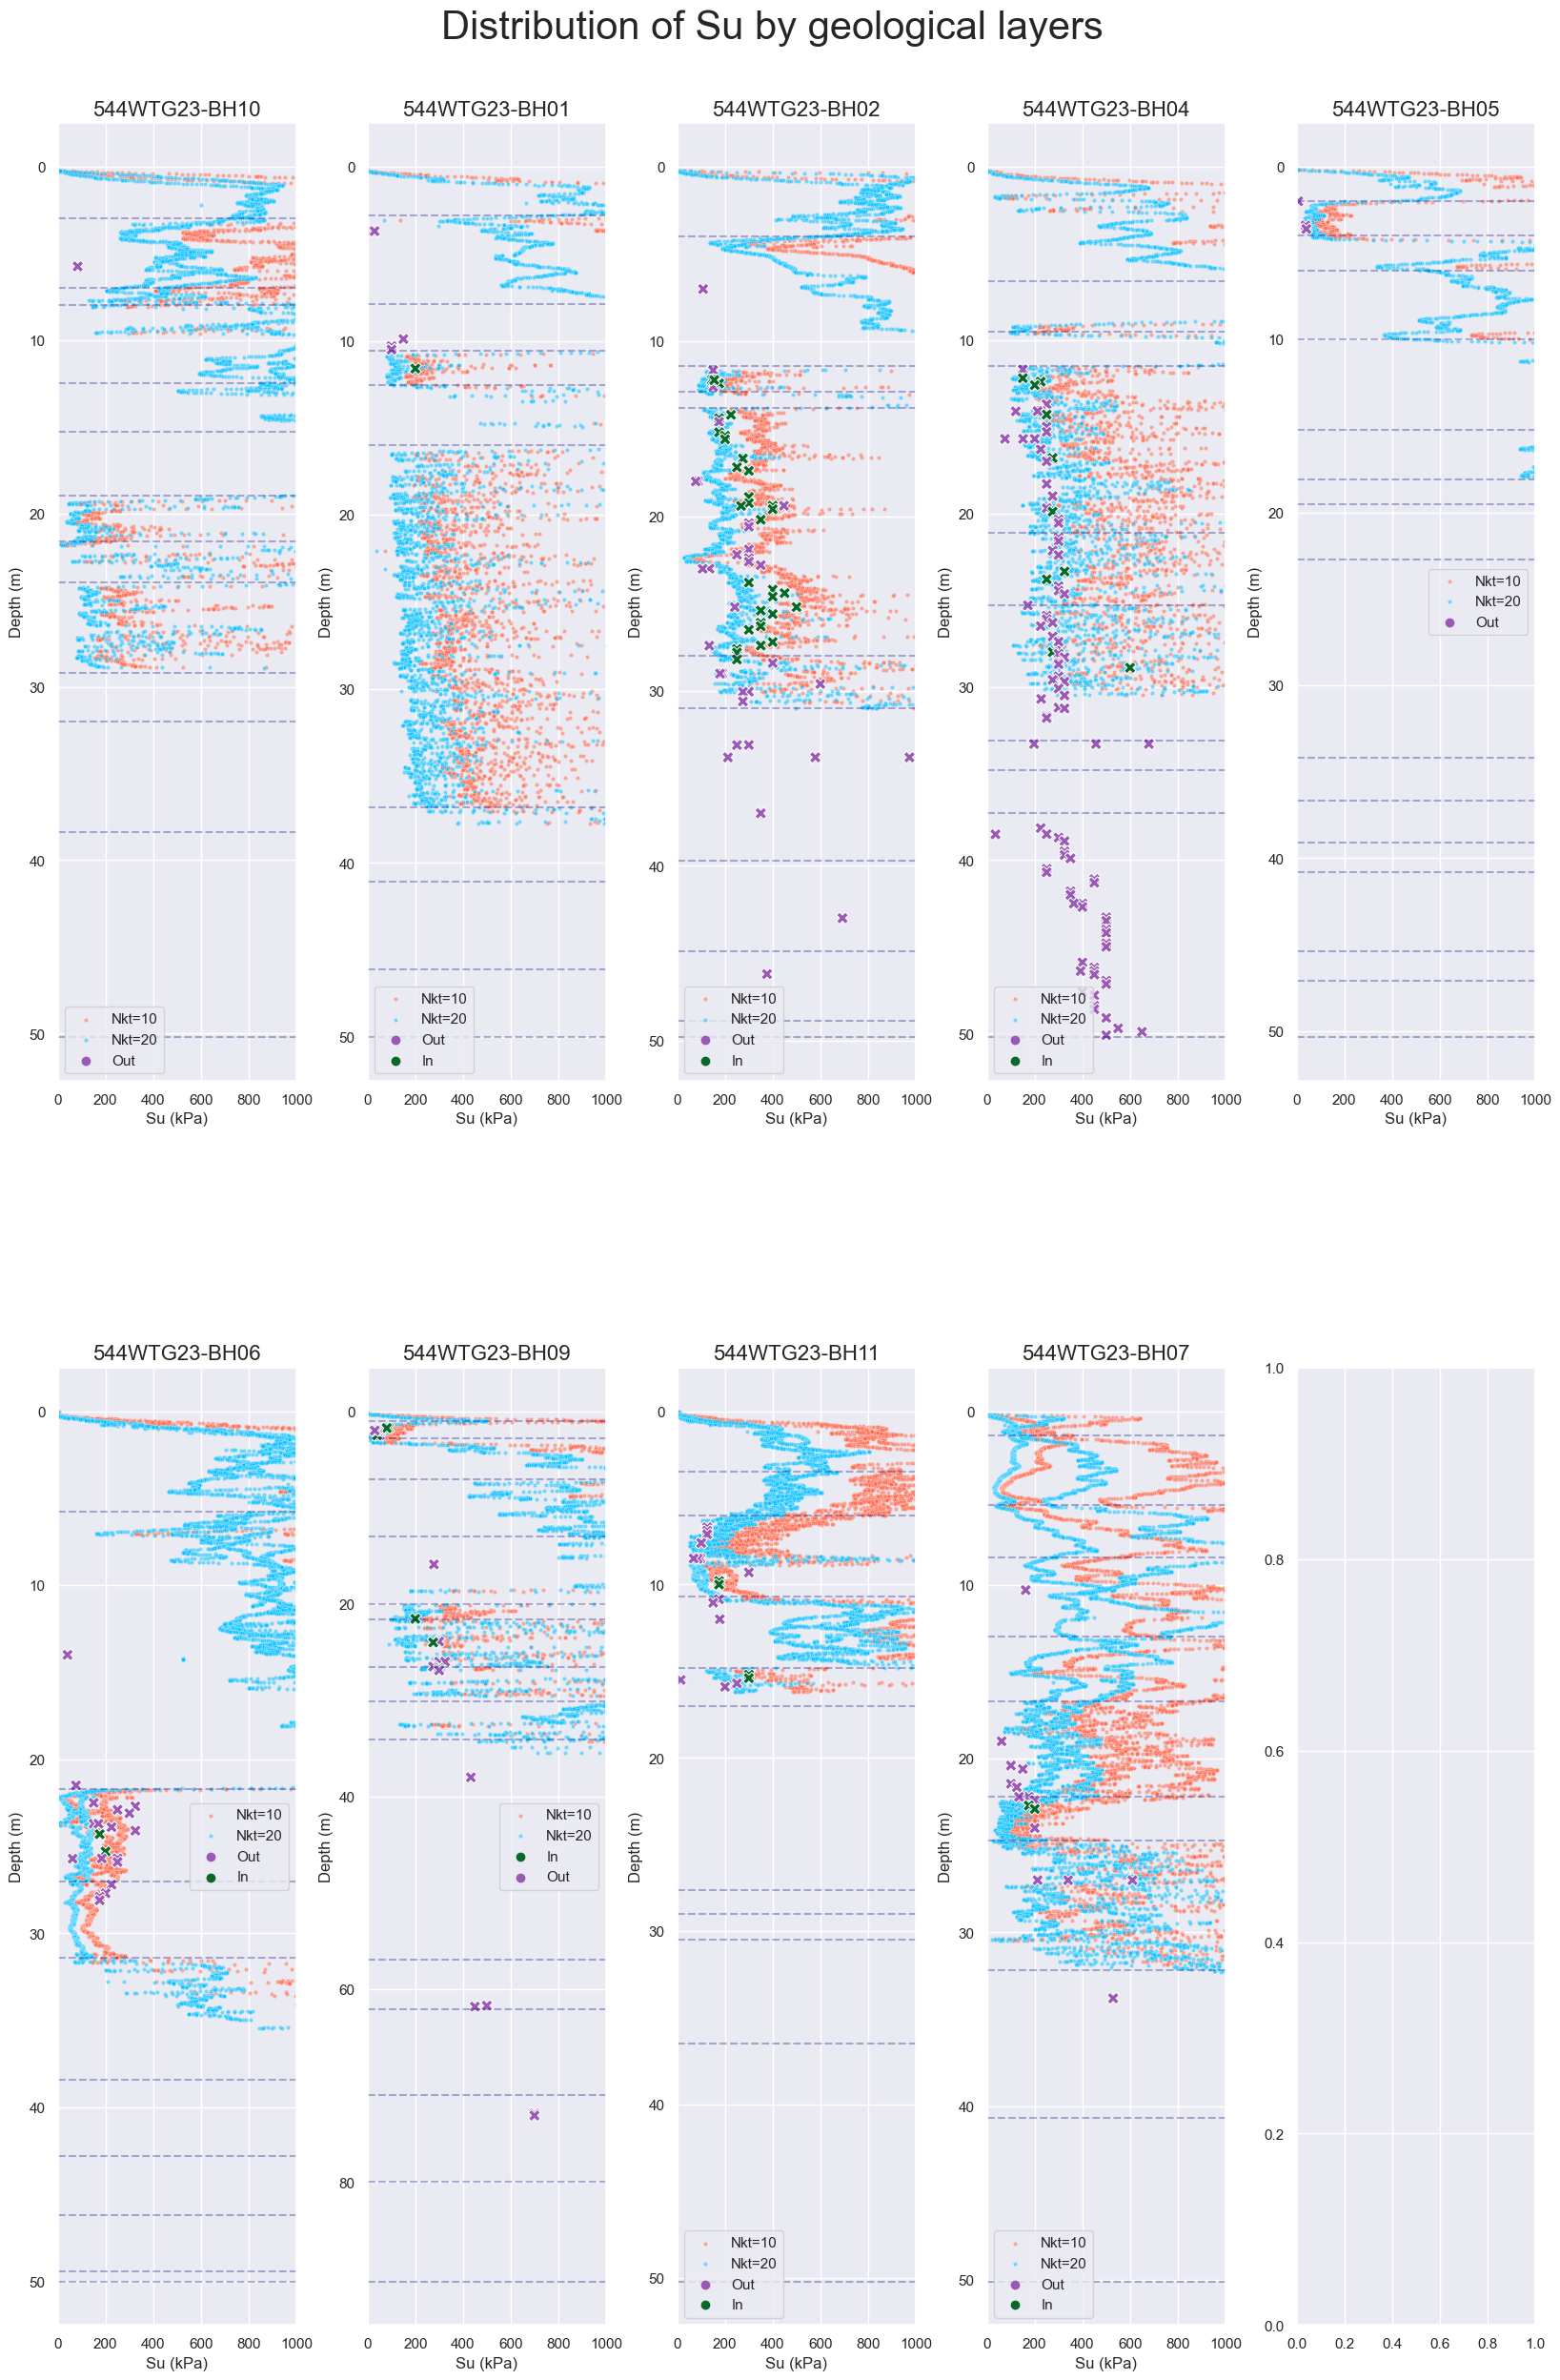

In [22]:
plot_df = cpt_df
xmin, xmax = 0, 1000
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", s=10, label="Nkt=10")
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="deepskyblue", s=10, label="Nkt=20")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Nkt check", marker="X", alpha=1, ax=axes[row, col], s=80,
                                palette=dict(Out="#9b59b6", In="#076928", Mid="#f20000"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1

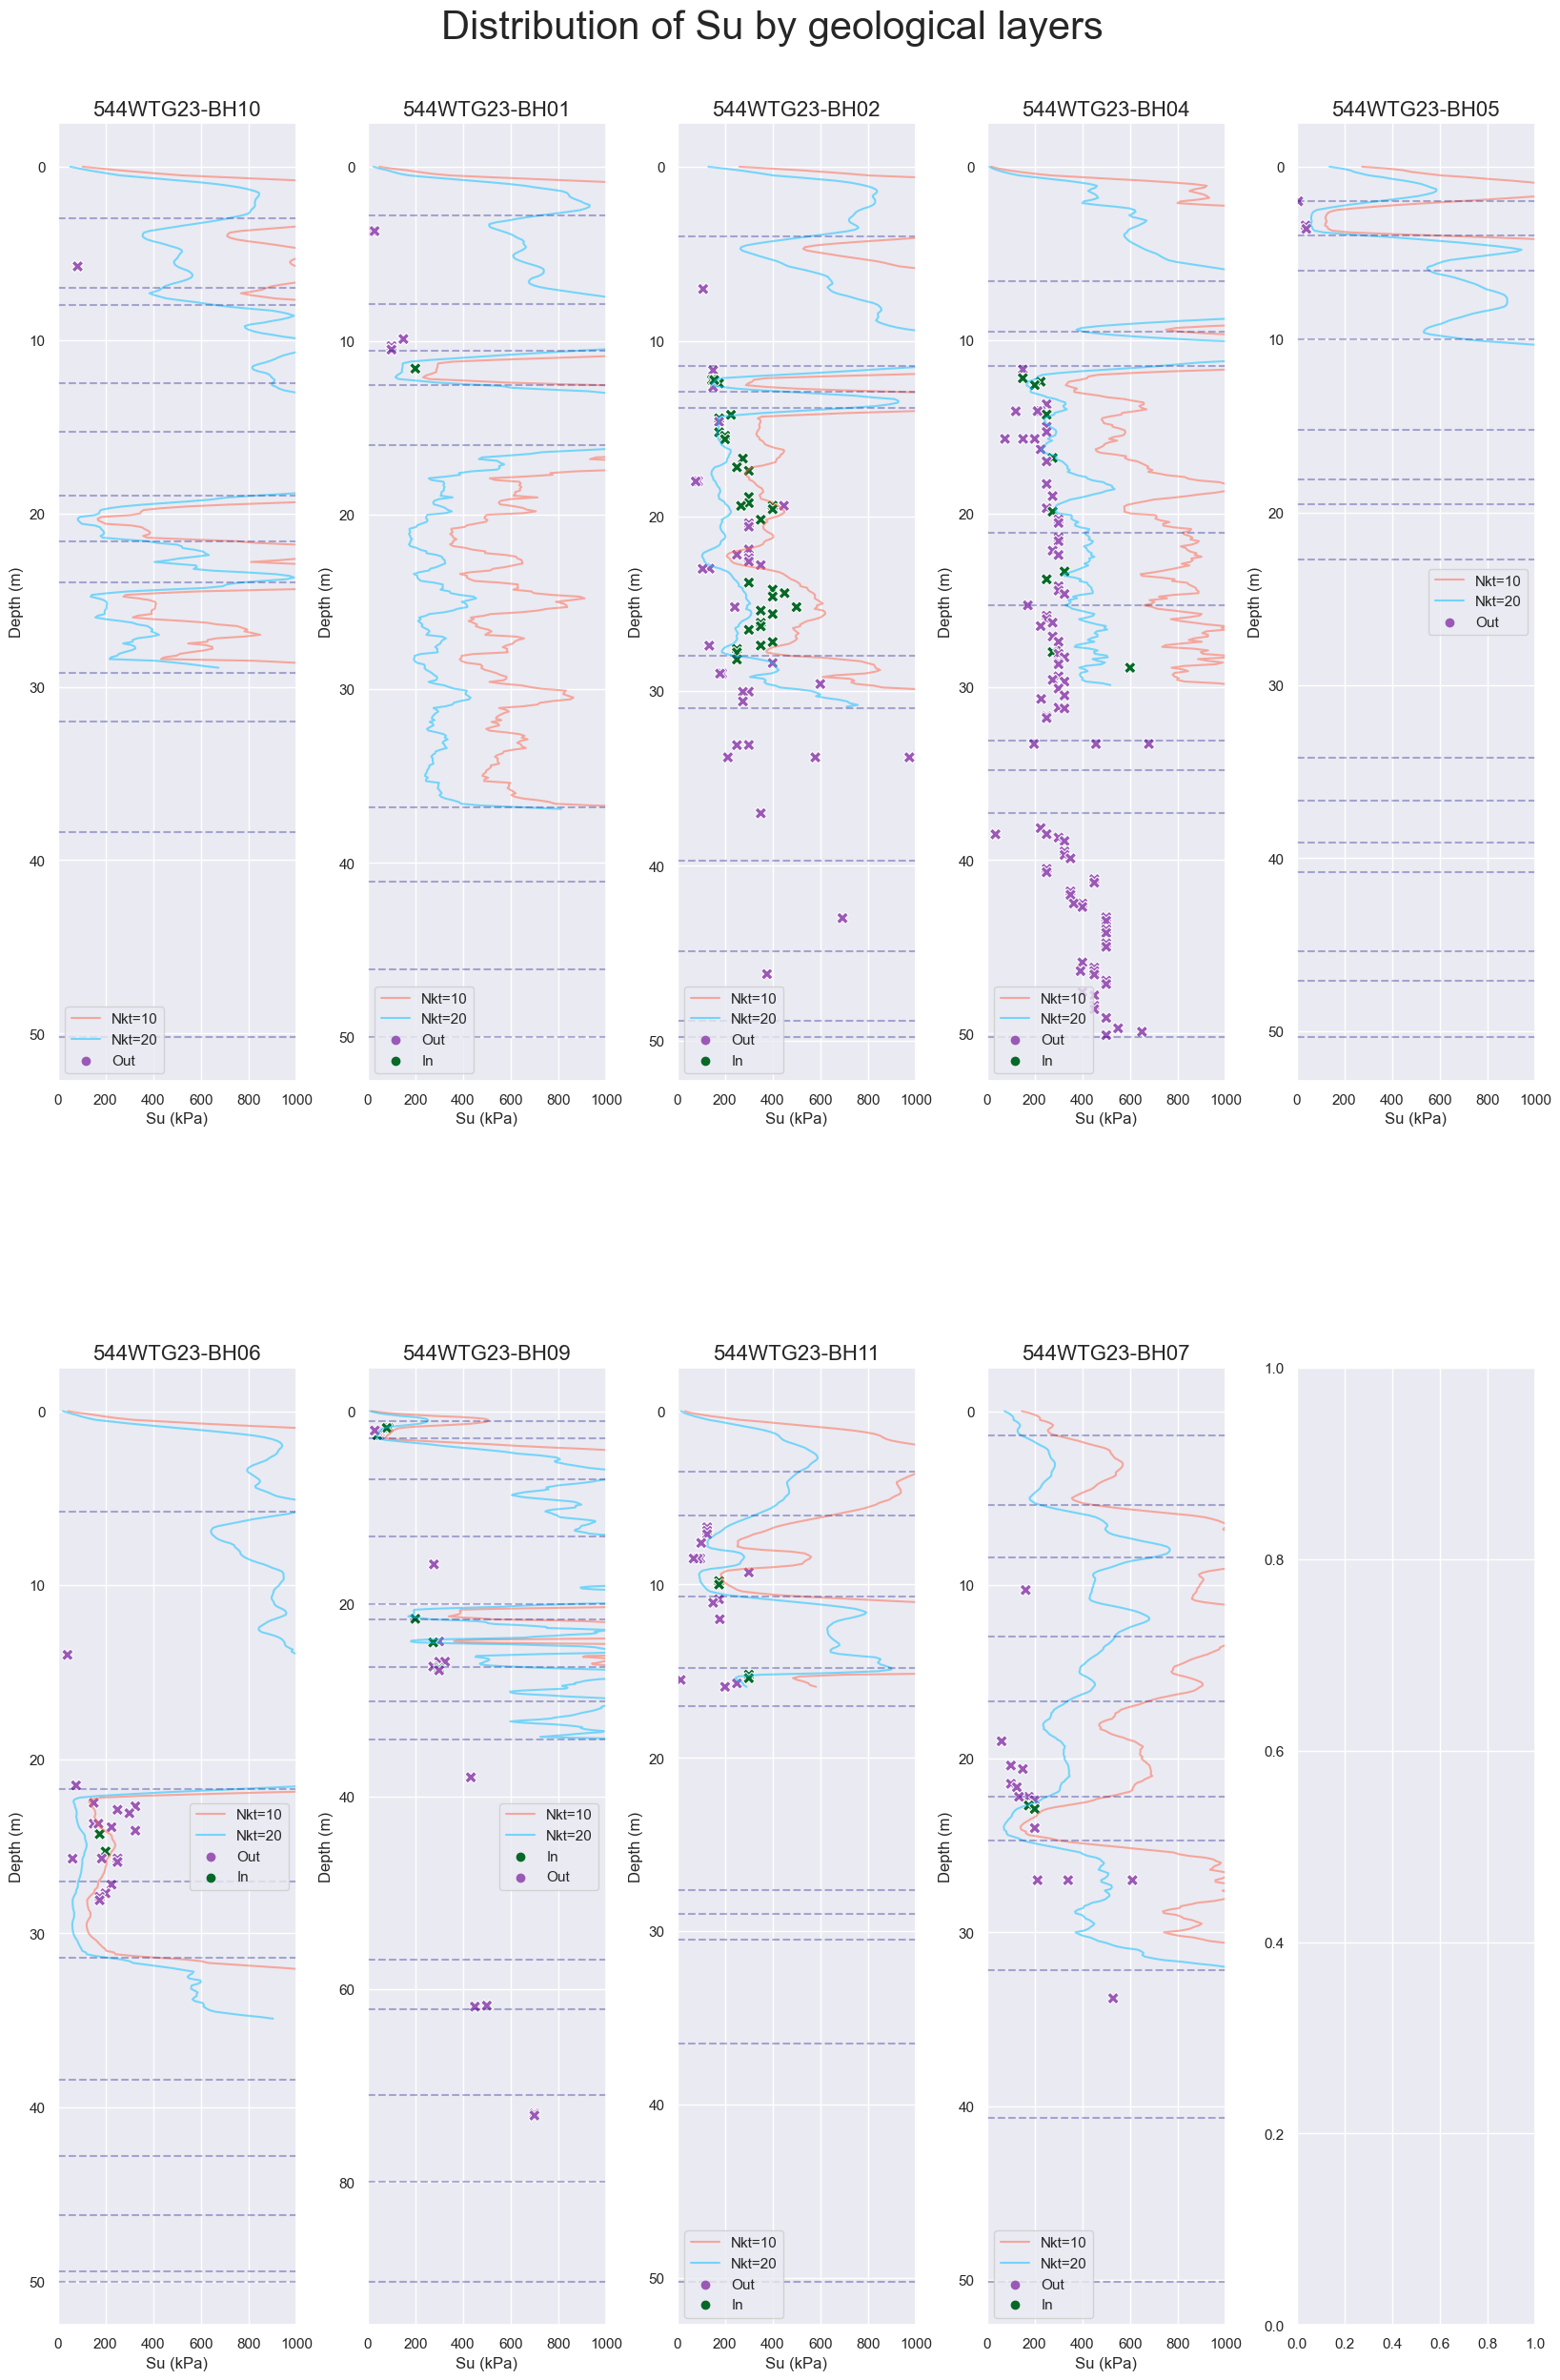

In [23]:
plot_df = su_mean
xmin, xmax = 0, 1000
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f'Distribution of {parameter} by geological layers', size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 30)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.lineplot(data=filtered_df, x="Su (Nkt 10)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", orient="y", label="Nkt=10")
            ax = sns.lineplot(data=filtered_df, x="Su (Nkt 20)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="deepskyblue", orient="y", label="Nkt=20")
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Nkt check", marker="X", alpha=1, ax=axes[row, col], s=80,
                                palette=dict(Out="#9b59b6", In="#076928", Mid="#f20000"))
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            ax.legend()
            bh += 1

## Nkt statistics

Mean = 14.66
Median = 14.02


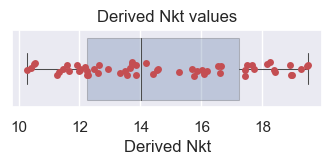

In [26]:
print("Mean =", round(su_df[su_df["Nkt check"] == "In"]["Derived Nkt"].mean(), 2))
print("Median =", round(su_df[su_df["Nkt check"] == "In"]["Derived Nkt"].median(), 2))
under25_df = su_df[su_df["Nkt check"] == "In"]
sns.set(rc={"figure.figsize":(4, 1)})
sns.stripplot(data=under25_df, x="Derived Nkt", c="r")
sns.boxplot(data=under25_df, x="Derived Nkt", boxprops=dict(alpha=.3), linewidth=.75, showfliers= False).set_title("Derived Nkt values")
# Seet value
derived_Nkt = su_df[su_df["Nkt check"] == "In"]["Derived Nkt"].mean()
cpt_df["Su (Nkt derived)"] =  (cpt_df["qnet (kPa)"] - cpt_df["σv (kPa)"]) / derived_Nkt

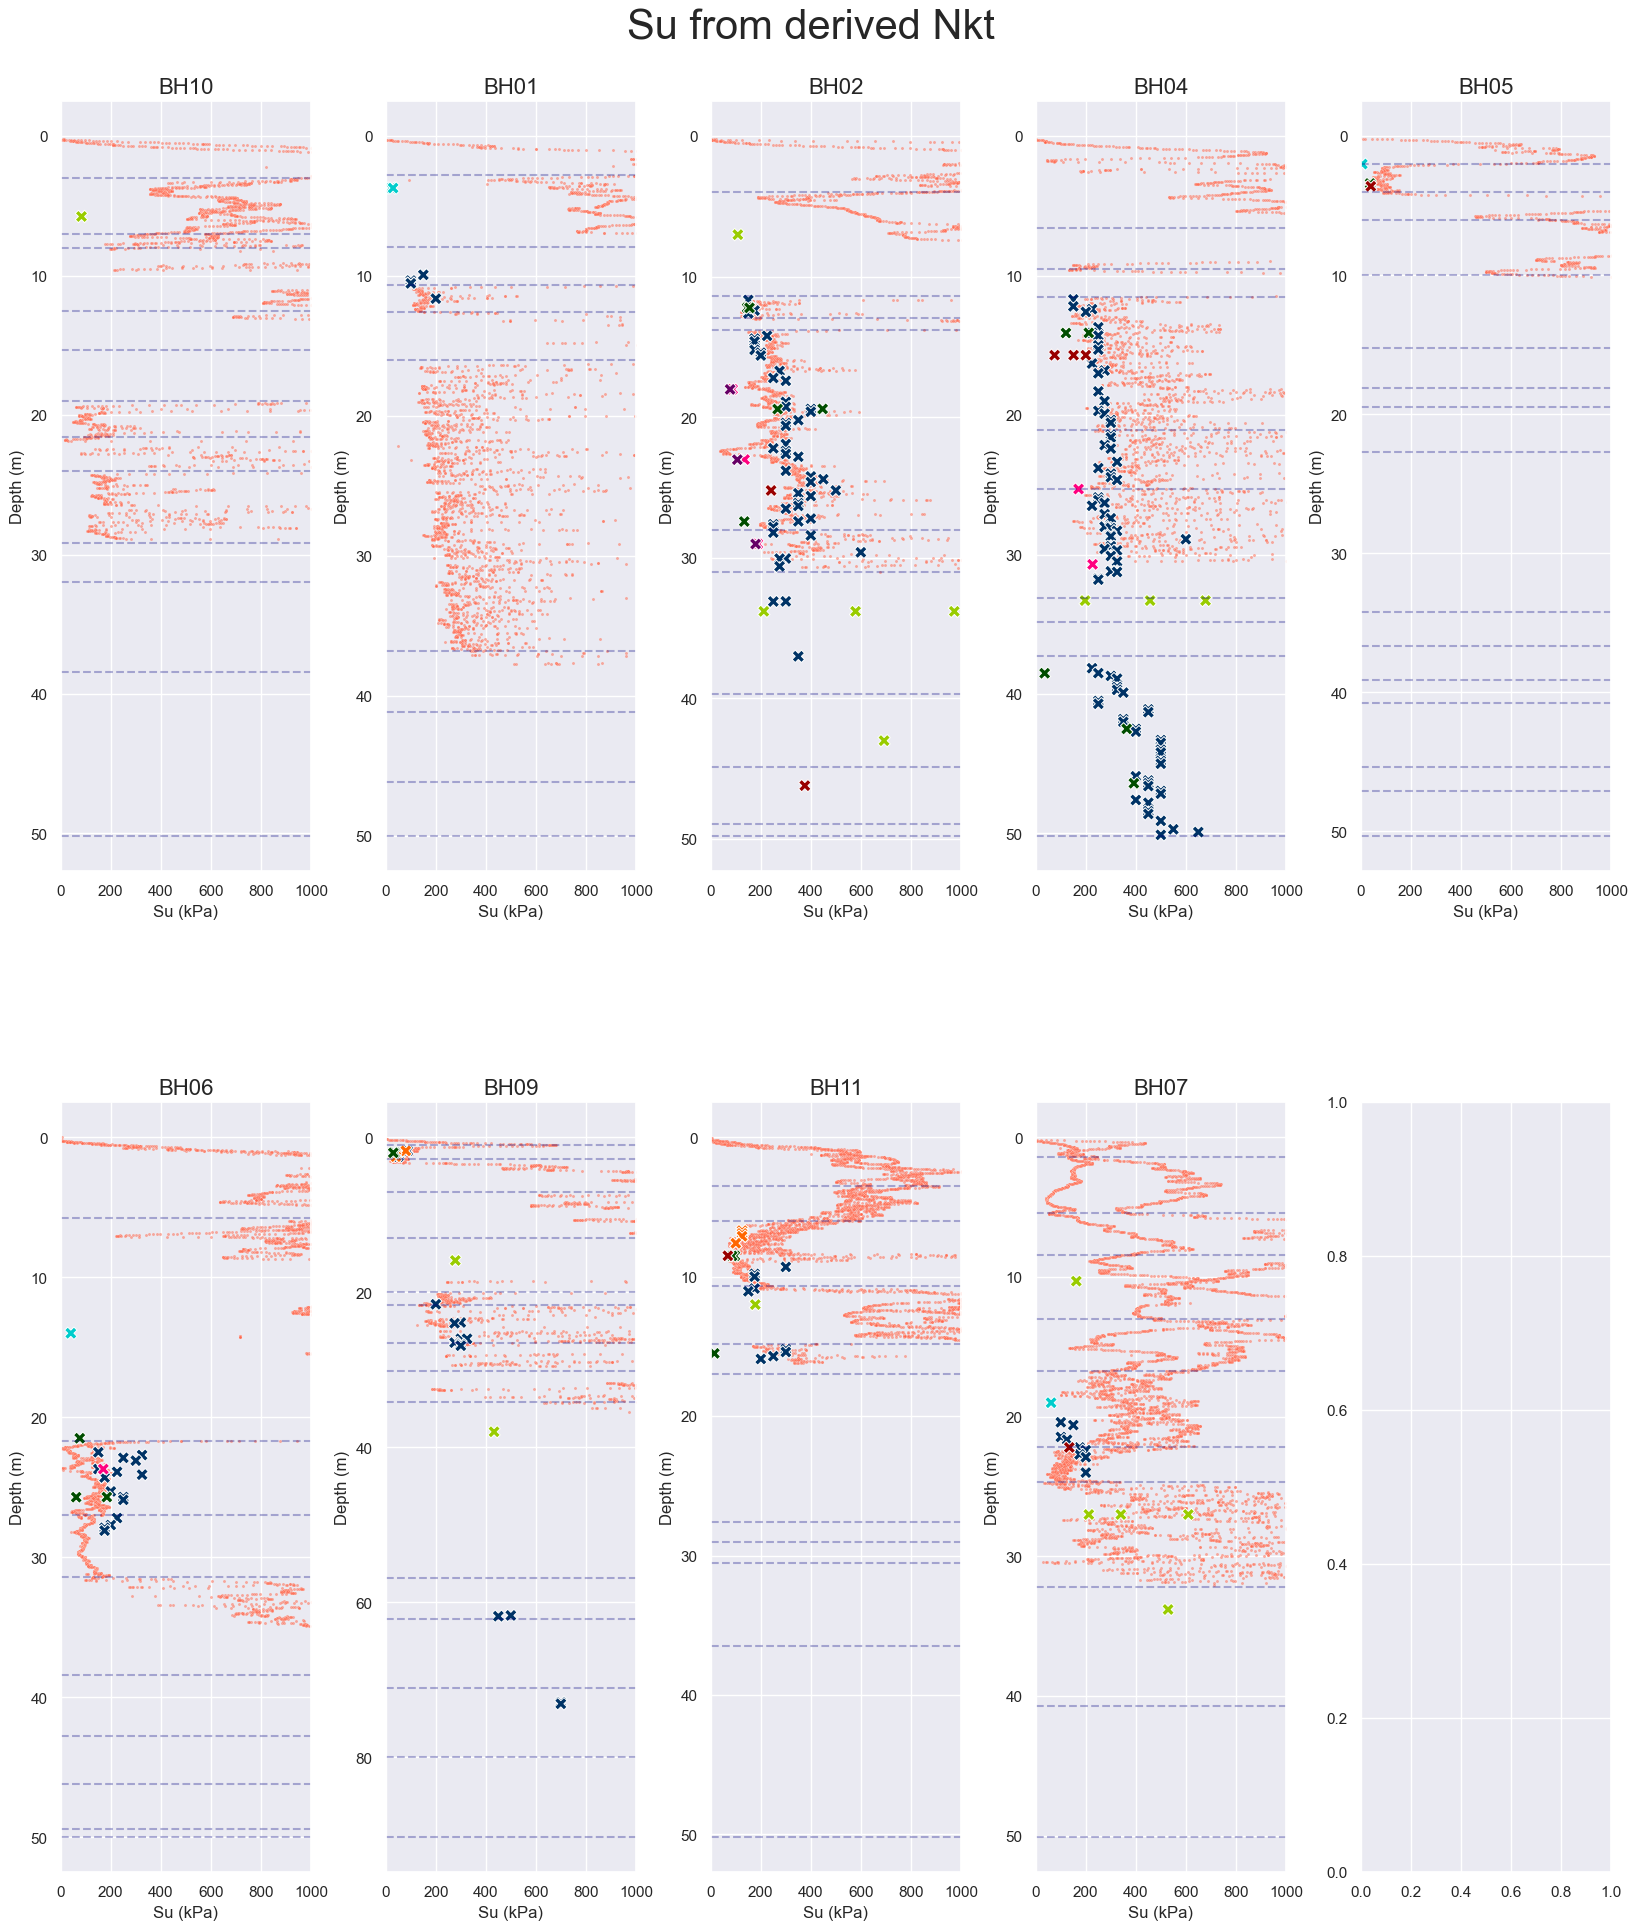

In [42]:
plot_df = cpt_df
xmin, xmax = 0, 1000
su_test_palette = {'LPEN': "#003366", 'TORV':"#ff6600", 'UU':"#004d00", 'CAUC':"#ff007f", 'CAUE':"#660066",
 'CID':"#99cc00", 'CIU':"#990000", 'DSS':"#00cccc"}
############################
borehole_list = plot_df["PointID"].unique()
bh = 0
fig, axes = plt.subplots(2, 5)
fig.suptitle(f"Su from derived Nkt", size=30, x=0.5, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(rc={"figure.figsize":(20, 23)})
sns.set(font_scale=1) 
for row in range(2):
    for col in range(5):
        if bh >= len(borehole_list):
            pass
        else:
            filtered_df = plot_df[plot_df["PointID"] == borehole_list[bh]]
            fsu_df = su_df[su_df["PointID"] == borehole_list[bh]]
            ax = sns.scatterplot(data=filtered_df, x="Su (Nkt derived)", y="Depth (m)", alpha=0.5, ax=axes[row, col], color="tomato", s=5)
            ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Test", marker="X", alpha=1, ax=axes[row, col], s=80,
                                palette=su_test_palette, legend=False)
            #ax = sns.scatterplot(data=fsu_df, x=parameter, y="Depth", hue="Nkt check", marker="X", alpha=1, ax=axes[row, col], s=80,
                                #palette=dict(Out="#9b59b6", In="#076928", Mid="#f20000"))
 
            # Plot geology
            bh_geo = geo_df[geo_df["PointID"] == borehole_list[bh]]
            for z in bh_geo["Depth"].to_list():
                    ax = sns.lineplot(x=[xmin, xmax], y=[z, z], ax=axes[row, col], alpha=0.3, color="navy", linestyle='dashed')
            ax.set_title(borehole_list[bh][-4:], size=16)
            ax.set_ylabel("Depth (m)")
            ax.set_xlabel("Su (kPa)")
            ax.invert_yaxis()
            ax.set_xlim(0, 1000)
            #ax.legend()
            bh += 1

In [33]:
su_df["Test"].unique()

array(['LPEN', 'TORV', 'UU', 'CAUC', 'CAUE', 'CID', 'CIU', 'DSS'],
      dtype=object)

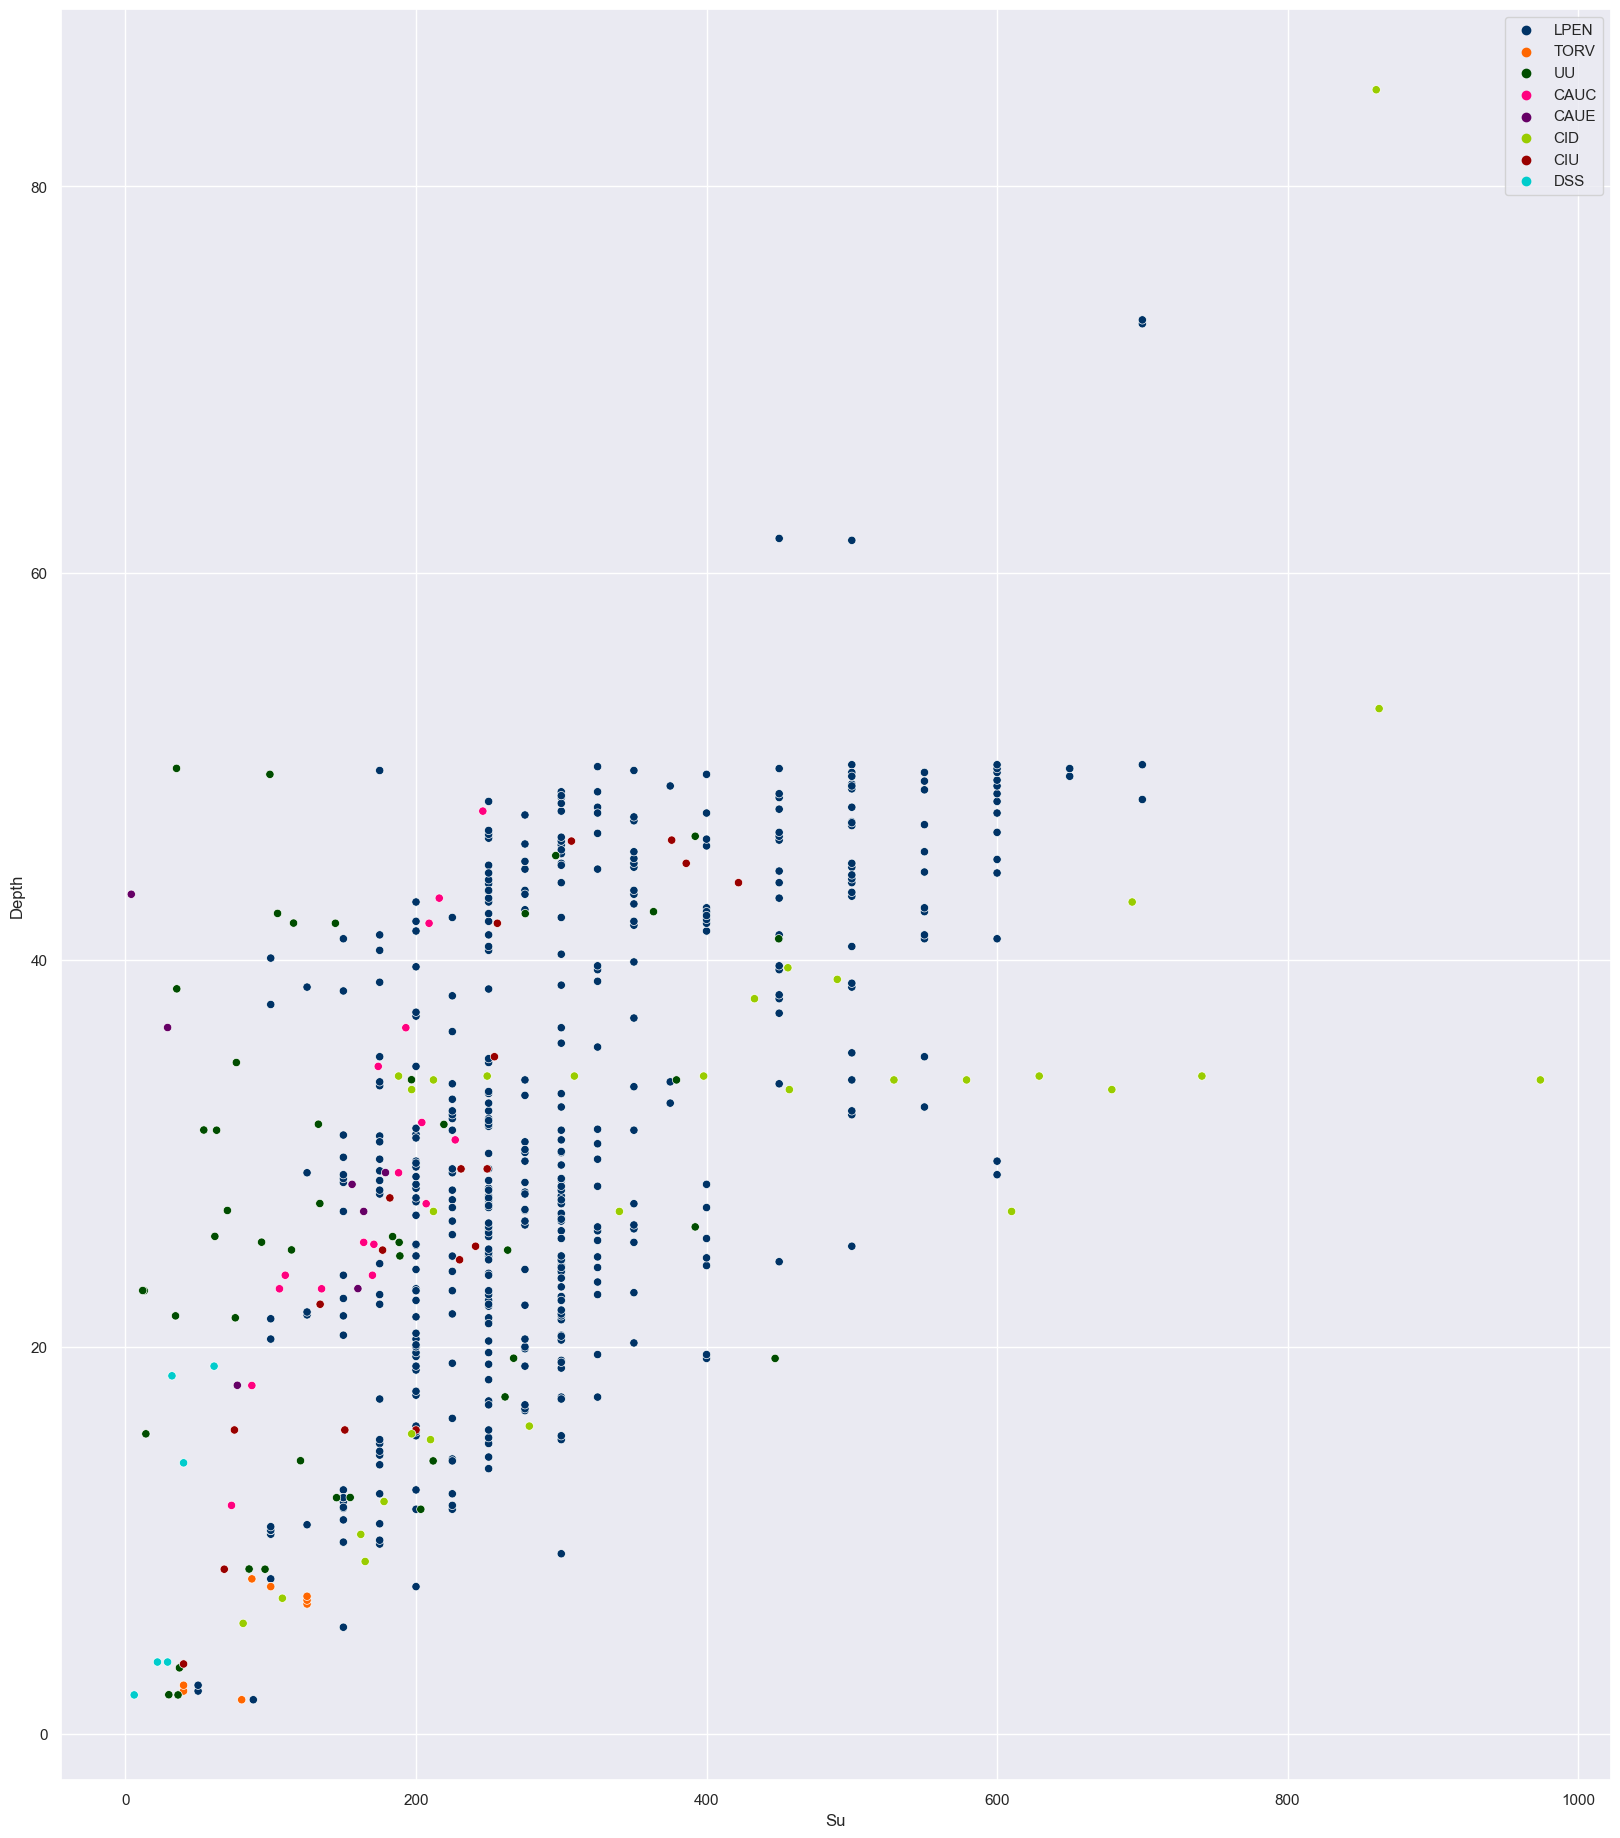

In [41]:
su_test_palette = {'LPEN': "#003366", 'TORV':"#ff6600", 'UU':"#004d00", 'CAUC':"#ff007f", 'CAUE':"#660066",
 'CID':"#99cc00", 'CIU':"#990000", 'DSS':"#00cccc"}
ax = sns.scatterplot(data=su_df, x="Su", y="Depth", hue="Test", palette=su_test_palette)
ax.legend()